In [1]:
import sqlite3
from sqlite3 import Error
from sqlite3 import IntegrityError
from ipyfilechooser import FileChooser
import pandas as pd
import io
import requests
import numpy
from scipy import stats
import math

In [ ]:
starting_directory = '/Users/Joseph'
chooser = FileChooser(starting_directory)
display(chooser)

In [ ]:
Screen='Neuron_Genes_Screen'
file=chooser.selected
folder_path=chooser.selected_path
print(file)
print(folder_path)

In [ ]:
baseline_output = pd.read_csv(file, index_col=0).drop(columns=['index'])
print(baseline_output)
# X=baseline_output.drop(columns=['Time','n','Number','Tap','Puff','x','y','plate','dataset','Gene','Allele'])
# print(X)

In [ ]:
tap_output = pd.read_csv(file, index_col=0)
print(tap_output)

In [ ]:
# test=tap_output.dropna()
# print(test[test.dataset=='mod-5_n822'].taps.unique())

In [ ]:
PD_tap=tap_output
PD_first_tap = PD_tap[(PD_tap.taps==1)].reset_index().drop(columns="index")
PD_last_three_taps = PD_tap[((PD_tap.taps>=28)&(PD_tap.taps<=30))].reset_index().drop(columns="index")
PD_recov_taps = PD_tap[(PD_tap.taps==31)].reset_index().drop(columns="index")

print(PD_first_tap)
print("-"*55)
print(PD_last_three_taps)
print("-"*55)
# print(PD_recov_taps)

print("-"*55)
PD_final_taps=PD_last_three_taps.groupby(["dataset", "Date","Plate_id","Screen","Gene","Allele","plate"]).mean().reset_index()
# print(PD_final_taps)
PD_final_taps=PD_final_taps.rename(columns={"dura": "final_dura", "prob": "final_prob", "speed": "final_speed"}, errors="raise")


print("PD_final_taps")
print(PD_final_taps)
print("-"*55)


PD_first_tap=PD_first_tap.rename(columns={"dura": "init_dura", "prob": "init_prob", "speed": "init_speed"}, errors="raise")
# print(PD_final_taps)
# print(PD_first_tap)
PD_habit_levels = pd.merge(PD_first_tap, PD_final_taps, on =['dataset','plate',"Plate_id","Screen","Gene","Allele","Date"], how ='left')
PD_habit_levels = PD_habit_levels.dropna()

print('PD_habit_levels')
print(PD_habit_levels)
print("-"*55)
# print(PD_habit_levels)
PD_habit_levels['habit_dura']=PD_habit_levels.init_dura-PD_habit_levels.final_dura
PD_habit_levels['habit_prob']=PD_habit_levels.init_prob-PD_habit_levels.final_prob
PD_habit_levels['habit_speed']=PD_habit_levels.init_speed-PD_habit_levels.final_speed
# PD_habit_levels=PD_habit_levels.drop(columns=['time_x','time_y','dist_x','dist_y', 'Allele','Gene'])
PD_habit_levels=PD_habit_levels.drop(columns=['time_x','time_y','dist_x','dist_y'])

print('final version PD_habit_levels')
print(PD_habit_levels)
print("-"*55)

PD_recov_taps=PD_recov_taps.rename(columns={"dura": "recov_dura", "prob": "recov_prob", "speed":"recov_speed"})
PD_habituation = pd.merge(PD_habit_levels, PD_recov_taps, on =['dataset','plate',"Plate_id","Screen","Gene","Allele","Date"], how ='left')

PD_habituation = PD_habit_levels
PD_habituation = PD_habituation.drop(columns=['taps_x','taps_y','taps','time'])
# PD_habituation = PD_habituation.drop(columns=['taps_x','taps_y'])
PD_habituation = PD_habituation.dropna()
# print(PD_habituation)
# PD_habituation['recovery_dura']=0
# PD_habituation['recovery_prob']=0
# PD_habituation['recovery_speed']=0
# PD_habituation['dist']=0
# PD_habituation['recov_prob']=0
# PD_habituation['recov_dura']=0
# PD_habituation['recov_speed']=0
PD_habituation['recovery_dura']=PD_habituation.init_dura-PD_habituation.recov_dura
PD_habituation['recovery_prob']=PD_habituation.init_prob-PD_habituation.recov_prob
PD_habituation['recovery_speed']=PD_habituation.init_speed-PD_habituation.recov_speed
tap_data=PD_habituation.dropna() 
tap_data=PD_habituation
print("-"*55)
print(tap_data)
# print(PD_recov_taps)
# print(PD_first_tap)
# print(PD_last_three_taps)
print("-"*55)
# print(PD_habit_levels)

### The below cell reads in file from online repository (github) - example in case this is possible in the future

In [ ]:
# # tap_url = 'https://osf.io/du9bj/files/osfstorage/650a2f9f1e76a4230e8a99a5?raw=true'
# tap_url='https://github.com/MyYummyPancake/NRSC510B/blob/main/tap_output.csv?raw=true'
# # s=requests.get(tap_url).content
# # tap_output=pd.read_csv(io.StringIO(s.decode('utf-8')))
# tap_output=pd.read_csv(tap_url, on_bad_lines='skip', index_col=0)
# print(tap_output)

In [ ]:
# print(tap_output['Gene'].unique())
# print(len(tap_output['Gene'].unique()))
# print(baseline_output['Gene'].unique())
# print(len(baseline_output['Gene'].unique()))

In [ ]:
# for x in tap_output['Gene'].unique():
#     tap_output_gene=tap_output[tap_output['Gene']==x]
#     gene_tap_data=tap_output[tap_output['Date'].isin(tap_output_gene['Date'].unique())]
#     gene_tap_data_final=gene_tap_data[gene_tap_data['Gene'].isin(['N2', x])]
#     gene_tap_data_final['taps']=gene_tap_data_final['taps'].astype(int)


# for x in baseline_output['Gene'].unique():
#     baseline_output_gene=baseline_output[baseline_output['Gene']==x]
#     gene_baseline_data=baseline_output[baseline_output['Date'].isin(baseline_output_gene['Date'].unique())]
#     gene_baseline_data_final=gene_baseline_data[gene_baseline_data['Gene'].isin(['N2', x])]
#     for a,b in zip(list_baseline_metrics, list_baseline_Tstats):
#         TTest_Allele(x, a, baseline_output, b)


# Run Statistics (T-Test and sample-mean distance) on Data

In [2]:
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
import tqdm

In [ ]:
# print(baseline_output)

## Sample Mean Distance & Confidence Interval Calculation of Baseline Data
1. Calculate Mean

2. Calculate SEM

3. Calculate CI

4. Calculate Mean Distance From Control

In [ ]:
print(tap_data.columns)

In [ ]:
baseline_output_byplate=baseline_output.groupby(by=['Plate_id',
                                                    'Date',
                                                    'Screen',
                                                    'dataset',
                                                    'Gene',
                                                    'Allele'],as_index=False).mean().drop(columns=['Plate_id',
                                                                                                    'n',
                                                                                                    'Number',
                                                                                                   'Date',
                                                                                                    'Time',
                                                                                                    'Screen',
                                                                                                    'dataset',
                                                                                                    'Allele'])
print(baseline_output_byplate)
print('-'*30)
print(baseline_output_byplate.columns[1:])
# print(baseline_output_byplate[['Gene','Instantaneous Speed']].copy())

print('-'*30)
tap_data_byplate=tap_data.groupby(by=['Plate_id',
                                    'Date',
                                    'Screen',
                                    'dataset',
                                    'Gene',
                                    'Allele'],as_index=False).mean().drop(columns=['Plate_id',
                                                                                    'Screen',
                                                                                    'dataset',
                                                                                    'Allele',
                                                                                   'Date',
                                                                                    'dist',
                                                                                    'plate',
                                                                                    'recov_dura',
                                                                                    'recov_prob',
                                                                                    'recov_speed'])


print(tap_data_byplate)
print('-'*30)
print(tap_data_byplate.columns)
print('-'*50)

print("allele output")
print('-'*50)
baseline_output_allele_byplate=baseline_output.groupby(by=['Plate_id',
                                                            'Date',
                                                            'Screen',
                                                            'dataset',
                                                            'Gene',
                                                            'Allele'],as_index=False).mean().drop(columns=['Plate_id',
                                                                                                            'n',
                                                                                                            'Number',
                                                                                                            'Time',
                                                                                                            'Screen',
                                                                                                           'Date',
                                                                                                            'Gene',
                                                                                                            'Allele'])
print(baseline_output_allele_byplate)
print('-'*50)
print(baseline_output_allele_byplate.columns)
# print(baseline_output_byplate[['Gene','Instantaneous Speed']].copy())

print('-'*50)
tap_data_allele_byplate=tap_data.groupby(by=['Plate_id',
                                            'Date',
                                            'Screen',
                                            'dataset',
                                            'Gene',
                                            'Allele'],as_index=False).mean().drop(columns=['Plate_id',
                                                                                            'Screen',
                                                                                            'Gene',
                                                                                           'Date',
                                                                                            'Allele',
                                                                                            'dist',
                                                                                            'plate',
                                                                                            'recov_dura',
                                                                                            'recov_prob',
                                                                                            'recov_speed'])


print(tap_data_allele_byplate)
print('-'*50)
print(tap_data_allele_byplate.columns)

In [ ]:
# print(tap_data_allele_byplate[tap_data_allele_byplate.dataset=='N2_XJ1'])

In [ ]:
''' 
input: one pd.DataFrame with multiple columns (1st column is the index, the other are phenotypes)
return: list of pd.DataFrame, each DataFrame with 2 columns: index and 1 phenotype, 
        for how many phenotypes there are in the input
'''
def extract_phenotypes(df):
    list_phenotypes_df = []
    phenotypes = df.columns[1:]
    index = df.columns[0]
    for i in phenotypes:
        new_df = df[[index, i]].copy()
        list_phenotypes_df.append(new_df)
    return list_phenotypes_df


''' 
input: one pd.DataFrame with multiple columns (1st column is the index, the other are phenotypes)
return: list of pd.DataFrame, each DataFrame with 2 columns: index and 1 phenotype, 
        for how many phenotypes there are in the input
'''
def extract_allele_phenotypes(df):
    list_phenotypes_df = []
    phenotypes = df.columns[1:]
    index = df.columns[0]
    for i in phenotypes:
        new_df = df[[index, i]].copy()
        list_phenotypes_df.append(new_df)
    return list_phenotypes_df




'''
input: list of dataframes with 2 columns (1st one is index, 2nd one are indiviudal phenotypes)
        output from extract_phenotypes function

output: the same list of dataframes with additional calculated columns for:
                1. mean
                2. count
                3. std
                4. ci95_hi
                5. ci95_low
                6. ci95
'''
        # baseline_output_gene=baseline_output[baseline_output['dataset']==x]
        # gene_baseline_data=baseline_output[baseline_output['Date'].isin(baseline_output_gene['Date'].unique())]
        # gene_baseline_data_final=gene_baseline_data[gene_baseline_data['dataset'].isin(['N2', x])]

def calculate_MSD(list_of_dfs):
    new_list_of_dfs=[]
    for i in list_of_dfs:
        calculate_1= i.groupby(by=['Gene'], as_index=False).agg(['mean', 'count', 'sem'])
        calculate_2= ci95(calculate_1)
        N2_data = calculate_2[calculate_2.index=='N2']
        calculate_2.iloc[:,0] = calculate_2.iloc[:,0]-N2_data.iloc[0,0]
        calculate_2.iloc[:,3] = calculate_2.iloc[:,3]-N2_data.iloc[0,0]
        calculate_2.iloc[:,4] = calculate_2.iloc[:,4]-N2_data.iloc[0,0]
      
        
        # calculate_2.columns=['_'.join(col) for col in calculate_2.columns.values]
        new_list_of_dfs.append(calculate_2)
    return new_list_of_dfs
    


'''
input: df of 4 columns: index, mean, count, std

output: df of 6 columns: index, mean, count, std, ci95_hi, ci95_low

'''
def ci95(df):
    for metric in df.columns.levels[0]:
        if metric == 'Gene':
            pass
        else:
            ci95_hi = []
            ci95_lo = []
            for i in df[metric].index:
                m, c, s = df[metric].loc[i]
                ci95_hi.append(stats.t.interval(confidence=0.95, df=c-1, loc=m, scale=s)[1])
                ci95_lo.append(stats.t.interval(confidence=0.95, df=c-1, loc=m, scale=s)[0])
            df[metric,'ci95_hi'] = ci95_hi
            df[metric,'ci95_lo'] = ci95_lo
            # df[metric,'ci95']=list(zip(ci95_lo,ci95_hi))
    return df



'''
input: list of dataframes with 2 columns (1st one is index, 2nd one are indiviudal phenotypes)
        output from extract_phenotypes function

output: the same list of dataframes with additional calculated columns for:
                1. mean
                2. count
                3. std
                4. ci95_hi
                5. ci95_low
                6. ci95
'''
        # baseline_output_gene=baseline_output[baseline_output['dataset']==x]
        # gene_baseline_data=baseline_output[baseline_output['Date'].isin(baseline_output_gene['Date'].unique())]
        # gene_baseline_data_final=gene_baseline_data[gene_baseline_data['dataset'].isin(['N2', x])]

def calculate_allele_MSD(list_of_dfs):
    new_list_of_dfs=[]
    for i in list_of_dfs:
        calculate_1= i.groupby(by=['dataset'], as_index=False).agg(['mean', 'count', 'sem'])
        calculate_2= ci95_allele(calculate_1)
        N2_data = calculate_2[calculate_2.index=='N2_XJ1']
        calculate_2.iloc[:,0] = calculate_2.iloc[:,0]-N2_data.iloc[0,0]
        calculate_2.iloc[:,3] = calculate_2.iloc[:,3]-N2_data.iloc[0,0]
        calculate_2.iloc[:,4] = calculate_2.iloc[:,4]-N2_data.iloc[0,0]
        # calculate_2.columns=['_'.join(col) for col in calculate_2.columns.values]
        new_list_of_dfs.append(calculate_2)
    return new_list_of_dfs
    
        
'''
input: df of 4 columns: index, mean, count, std

output: df of 6 columns: index, mean, count, std, ci95_hi, ci95_low

'''
def ci95_allele(df):
    for metric in df.columns.levels[0]:
        if metric == 'dataset':
            pass
        else:
            ci95_hi = []
            ci95_lo = []
            for i in df[metric].index:
                m, c, s = df[metric].loc[i]
                ci95_hi.append(stats.t.interval(confidence=0.95, df=c-1, loc=m, scale=s)[1])
                ci95_lo.append(stats.t.interval(confidence=0.95, df=c-1, loc=m, scale=s)[0])
            df[metric,'ci95_hi'] = ci95_hi
            df[metric,'ci95_lo'] = ci95_lo
            # df[metric,'ci95']=list(zip(ci95_lo,ci95_hi))
    return df



In [ ]:
# test1 = extract_phenotypes(baseline_output_byplate)
# print(test1)
list_baseline_MSD=calculate_MSD(extract_phenotypes(baseline_output_byplate))
print(list_baseline_MSD)
# test2 = extract_phenotypes(tap_data_byplate)
# print(test2)
list_tap_MSD=calculate_MSD(extract_phenotypes(tap_data_byplate))
print(list_tap_MSD)

In [ ]:
for a in list_baseline_MSD:
    # b=a.groupby(['Gene'], as_index=False).mean()
    # print(a.columns.values[1])
    if a.columns.levels[0] == list_baseline_MSD[0].columns.levels[0]:
        baseline_MSD=a
    else:
        baseline_MSD=baseline_MSD.join(a)

for a in list_tap_MSD:
    # b=a.groupby(['Gene'], as_index=False).mean()
    # print(a.columns.values[1])
    if a.columns.levels[0] == list_tap_MSD[0].columns.levels[0]:
        tap_MSD=a
    else:
        tap_MSD=tap_MSD.join(a)

In [ ]:
print(baseline_MSD.columns.levels[0])
print("-"*30)
print(tap_MSD.columns.levels[0])

In [ ]:
test_df=list_baseline_MSD[-1]
# test_df['Crab']
test_df.columns.levels[0]

In [ ]:
combined_MSD = baseline_MSD.join(tap_MSD, on='Gene')
print(combined_MSD.columns.levels[0])


In [ ]:
combined_MSD=combined_MSD.rename(columns={"habit_dura":"Habituation of Response Duration",
                                         "habit_prob": "Habituation of Respones Probability",
                                         "habit_speed":"Habituation of Response Speed",
                                         "init_dura": "Initial Response Duration",
                                         "init_prob": "Initial Response Probability",
                                         "init_speed": "Initial Response Speed",
                                         "final_dura": "Final Response Duration",
                                         "final_prob": "Final Response Probability",
                                         "final_speed": "Final Response Speed",
                                         "recovery_dura": "Spontaneous Recovery of Response Duration",
                                         "recovery_prob": "Spontaneous Recovery of Response Probability",
                                         "recovery_speed": "Spontaneous Recovery of Response Speed"})
print(combined_MSD.columns.levels[0])
print(len(combined_MSD.columns.levels[0]))

In [ ]:
combined_MSD=combined_MSD.reset_index()
combined_MSD.columns = combined_MSD.columns.to_flat_index().str.join('-')
combined_MSD=combined_MSD.rename(columns={"Gene-": "Gene"})
combined_MSD['Screen']=Screen
print(combined_MSD)

## Allele-level SMD

In [ ]:
print(baseline_output_allele_byplate[baseline_output_allele_byplate.dataset=='N2_XJ1'])
print(tap_data_allele_byplate[tap_data_allele_byplate.dataset=='N2_N2'])

In [ ]:
# test1=extract_allele_phenotypes(baseline_output_allele_byplate)
# print(test1)
list_allele_baseline_MSD=calculate_allele_MSD(extract_allele_phenotypes(baseline_output_allele_byplate))
print(list_allele_baseline_MSD)

# test2=extract_allele_phenotypes(tap_data_allele_byplate)
# print(test2[0][test2[0].dataset=='N2_N2'])
list_allele_tap_MSD=calculate_allele_MSD(extract_allele_phenotypes(tap_data_allele_byplate))
print(list_allele_tap_MSD)

In [ ]:
for a in list_allele_baseline_MSD:
    # b=a.groupby(['Gene'], as_index=False).mean()
    # print(a.columns.values[1])
    if a.columns.levels[0] == list_allele_baseline_MSD[0].columns.levels[0]:
        allele_baseline_MSD=a
    else:
        allele_baseline_MSD=allele_baseline_MSD.join(a)

for a in list_allele_tap_MSD:
    # b=a.groupby(['Gene'], as_index=False).mean()
    # print(a.columns.values[1])
    if a.columns.levels[0] == list_allele_tap_MSD[0].columns.levels[0]:
        allele_tap_MSD=a
    else:
        allele_tap_MSD=allele_tap_MSD.join(a)

In [ ]:
print(allele_baseline_MSD.columns.levels[0])
print("-"*30)
print(allele_tap_MSD.columns.levels[0])

In [ ]:
allele_combined_MSD = allele_baseline_MSD.join(allele_tap_MSD, on='dataset')
print(allele_combined_MSD.columns.levels[0])


In [ ]:
allele_combined_MSD=allele_combined_MSD.rename(columns={"habit_dura":"Habituation of Response Duration",
                                                         "habit_prob": "Habituation of Respones Probability",
                                                         "habit_speed":"Habituation of Response Speed",
                                                         "init_dura": "Initial Response Duration",
                                                         "init_prob": "Initial Response Probability",
                                                         "init_speed": "Initial Response Speed",
                                                         "final_dura": "Final Response Duration",
                                                         "final_prob": "Final Response Probability",
                                                         "final_speed": "Final Response Speed",
                                                         "recovery_dura": "Spontaneous Recovery of Response Duration",
                                                         "recovery_prob": "Spontaneous Recovery of Response Probability",
                                                         "recovery_speed": "Spontaneous Recovery of Response Speed"})
print(allele_combined_MSD.columns.levels[0])
print(len(allele_combined_MSD.columns.levels[0]))

In [ ]:
allele_combined_MSD=allele_combined_MSD.reset_index()
allele_combined_MSD.columns = allele_combined_MSD.columns.to_flat_index().str.join('-')
allele_combined_MSD=allele_combined_MSD.rename(columns={"dataset-": "dataset"})
allele_combined_MSD['Screen']=Screen
print(allele_combined_MSD)

### Allele-level T-stat analysis of baseline data

In [ ]:
list=baseline_output["dataset"].unique()
print(list)
print(len(list))
print(baseline_output)

In [ ]:
def TTest_Allele(Type, DF_ref, output):
    for a in DF_ref['dataset'].unique():
        # Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "XJ1" or DF_ref.Allele == "N2"][Type],equal_var=False)[0]
        Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele.isin(["XJ1","N2"])][Type],equal_var=False)[0]
        row=[a, Tstat]
        output.loc[len(output)]=row
    print(output)

In [ ]:
PD_baseline_instantspeed_T_allele=pd.DataFrame(columns = ["dataset","Instantaneous Speed"])
PD_baseline_intspeed_T_allele=pd.DataFrame(columns = ["dataset","Interval Speed"])
PD_baseline_bias_T_allele=pd.DataFrame(columns = ["dataset","Bias"])
PD_baseline_width_T_allele=pd.DataFrame(columns = ["dataset","Width"])
PD_baseline_length_T_allele=pd.DataFrame(columns = ["dataset","Length"])
PD_baseline_area_T_allele=pd.DataFrame(columns = ["dataset","Area"])
PD_baseline_angularspeed_T_allele=pd.DataFrame(columns = ["dataset","Angular Speed"])
PD_baseline_aspectratio_T_allele=pd.DataFrame(columns = ["dataset","Aspect Ratio"])
PD_baseline_kink_T_allele=pd.DataFrame(columns = ["dataset","Kink"])
PD_baseline_curve_T_allele=pd.DataFrame(columns = ["dataset","Curve"])
PD_baseline_crab_T_allele=pd.DataFrame(columns = ["dataset","Crab"])

list_baseline_Tstats_allele=[PD_baseline_instantspeed_T_allele,
                      PD_baseline_intspeed_T_allele,
                      PD_baseline_bias_T_allele,
                      PD_baseline_width_T_allele,
                      PD_baseline_length_T_allele,
                      PD_baseline_area_T_allele,
                      PD_baseline_angularspeed_T_allele,
                      PD_baseline_aspectratio_T_allele,
                      PD_baseline_kink_T_allele,
                      PD_baseline_curve_T_allele,
                      PD_baseline_crab_T_allele]

list_baseline_metrics=["Instantaneous Speed",
                       "Interval Speed",
                       "Bias",
                       "Width",
                       "Length",
                       "Area",
                       "Angular Speed",
                       "Aspect Ratio",
                       "Kink",
                       "Curve",
                       "Crab"]


In [ ]:
import tqdm
for x in baseline_output['dataset'].unique():
    # if x == "N2_XJ1" or x == "N2_N2":
    if x == "N2":
        pass
    else:
        baseline_output_gene=baseline_output[baseline_output['dataset']==x]
        gene_baseline_data=baseline_output[baseline_output['Date'].isin(baseline_output_gene['Date'].unique())]
        gene_baseline_data_final=gene_baseline_data[gene_baseline_data['dataset'].isin(['N2',x])]
        # gene_baseline_data_final=gene_baseline_data[gene_baseline_data['dataset'].isin(['N2_XJ1', 'N2_N2',x])]
        # print(gene_baseline_data_final['Gene'].unique())
        for a,b in zip(list_baseline_metrics, list_baseline_Tstats_allele):
            TTest_Allele(a, gene_baseline_data_final, b)

In [ ]:
PD_baseline_Tstats_allele=pd.DataFrame()
for a in list_baseline_Tstats_allele:
    b=a.groupby(['dataset'], as_index=False).mean()
    # print(a.columns.values[1])
    if b.columns.values[1] == list_baseline_Tstats_allele[0].columns.values[1]:
        PD_baseline_Tstats_allele=b
    else:
        PD_baseline_Tstats_allele=PD_baseline_Tstats_allele.join(b.iloc[:,1])
        
print(PD_baseline_Tstats_allele)

In [ ]:
PD_baseline_Tstats_allele=PD_baseline_Tstats_allele.set_index("dataset")
print(PD_baseline_Tstats_allele)
PD_baseline_Tstats_allele_sort=PD_baseline_Tstats_allele.sort_index()
print(PD_baseline_Tstats_allele_sort)

### Gene-level T-stat analysis of baseline data

In [ ]:
def TTest_Gene(Type, DF_ref, output):
    for a in DF_ref['Gene'].unique():
        Tstat=ttest_ind(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type],equal_var=False)[0]
        row=[a, Tstat]
        output.loc[len(output)]=row
    print(output)

In [ ]:
PD_baseline_instantspeed_T=pd.DataFrame(columns = ["Gene","Instantaneous Speed"])
PD_baseline_intspeed_T=pd.DataFrame(columns = ["Gene","Interval Speed"])
PD_baseline_bias_T=pd.DataFrame(columns = ["Gene","Bias"])
PD_baseline_width_T=pd.DataFrame(columns = ["Gene","Width"])
PD_baseline_length_T=pd.DataFrame(columns = ["Gene","Length"])
PD_baseline_area_T=pd.DataFrame(columns = ["Gene","Area"])
PD_baseline_angularspeed_T=pd.DataFrame(columns = ["Gene","Angular Speed"])
PD_baseline_aspectratio_T=pd.DataFrame(columns = ["Gene","Aspect Ratio"])
PD_baseline_kink_T=pd.DataFrame(columns = ["Gene","Kink"])
PD_baseline_curve_T=pd.DataFrame(columns = ["Gene","Curve"])
PD_baseline_crab_T=pd.DataFrame(columns = ["Gene","Crab"])

list_baseline_Tstats=[PD_baseline_instantspeed_T,
                      PD_baseline_intspeed_T,
                      PD_baseline_bias_T,
                      PD_baseline_width_T,
                      PD_baseline_length_T,
                      PD_baseline_area_T,
                      PD_baseline_angularspeed_T,
                      PD_baseline_aspectratio_T,
                      PD_baseline_kink_T,
                      PD_baseline_curve_T,
                      PD_baseline_crab_T]

list_baseline_metrics=["Instantaneous Speed",
                       "Interval Speed",
                       "Bias",
                       "Width",
                       "Length",
                       "Area",
                       "Angular Speed",
                       "Aspect Ratio",
                       "Kink",
                       "Curve",
                       "Crab"]

In [ ]:
for x in baseline_output['Gene'].unique():
    if x == "N2":
        pass
    else:
        baseline_output_gene=baseline_output[baseline_output['Gene']==x]
        gene_baseline_data=baseline_output[baseline_output['Date'].isin(baseline_output_gene['Date'].unique())]
        gene_baseline_data_final=gene_baseline_data[gene_baseline_data['Gene'].isin(['N2', x])]
        # print(gene_baseline_data_final['Gene'].unique())
        for a,b in zip(list_baseline_metrics, list_baseline_Tstats):
            TTest_Gene(a, gene_baseline_data_final, b)
            

In [ ]:
PD_baseline_Tstats=pd.DataFrame()
for a in list_baseline_Tstats:
    b=a.groupby(['Gene'], as_index=False).mean()
    # print(a.columns.values[1])
    if b.columns.values[1] == list_baseline_Tstats[0].columns.values[1]:
        PD_baseline_Tstats=b
    else:
        PD_baseline_Tstats=PD_baseline_Tstats.join(b.iloc[:,1])
        
print(PD_baseline_Tstats)

In [ ]:
PD_baseline_Tstats=PD_baseline_Tstats.set_index("Gene")
print(PD_baseline_Tstats)
PD_baseline_Tstats_sort=PD_baseline_Tstats.sort_index()
print(PD_baseline_Tstats_sort)

### T-stat analysis for tap-response data

In [ ]:
# PD_tap=tap_output
# PD_first_tap = PD_tap[(PD_tap.taps==1)].reset_index().drop(columns="index")
# PD_last_three_taps = PD_tap[((PD_tap.taps>=28)&(PD_tap.taps<=30))].reset_index().drop(columns="index")
# PD_recov_taps = PD_tap[(PD_tap.taps==31)].reset_index().drop(columns="index")
# print(PD_first_tap)
# print(PD_last_three_taps)
# print(PD_recov_taps)
# PD_final_taps=PD_last_three_taps.groupby(["dataset", "Date","Plate_id","Screen","Gene","Allele","plate"]).mean().reset_index()
# print(PD_final_taps)

In [ ]:
# PD_final_taps=PD_final_taps.rename(columns={"dura": "final_dura", "prob": "final_prob", "speed": "final_speed"}, errors="raise")
# PD_first_tap=PD_first_tap.rename(columns={"dura": "init_dura", "prob": "init_prob", "speed": "init_speed"}, errors="raise")
# print(PD_final_taps)
# print(PD_first_tap)

In [ ]:
# PD_habit_levels = pd.merge(PD_first_tap, PD_final_taps, on =['dataset','plate',"Plate_id","Screen","Gene","Allele","Date"], how ='left')
# PD_habit_levels = PD_habit_levels.dropna()
# print(PD_habit_levels)

In [ ]:
# PD_habit_levels['habit_dura']=PD_habit_levels.init_dura-PD_habit_levels.final_dura
# PD_habit_levels['habit_prob']=PD_habit_levels.init_prob-PD_habit_levels.final_prob
# PD_habit_levels['habit_speed']=PD_habit_levels.init_speed-PD_habit_levels.final_speed
# # PD_habit_levels=PD_habit_levels.drop(columns=['time_x','time_y','dist_x','dist_y', 'Allele','Gene'])
# PD_habit_levels=PD_habit_levels.drop(columns=['time_x','time_y','dist_x','dist_y'])

In [ ]:
# PD_recov_taps=PD_recov_taps.rename(columns={"dura": "recov_dura", "prob": "recov_prob", "speed":"recov_speed"})
# PD_habituation = pd.merge(PD_habit_levels, PD_recov_taps, on =['dataset','plate',"Plate_id","Screen","Gene","Allele","Date"], how ='left')
# PD_habituation = PD_habituation.drop(columns=['taps_x','taps_y','taps','time'])
# PD_habituation = PD_habituation.dropna()
# print(PD_habituation)

In [ ]:
# PD_habituation['recovery_dura']=PD_habituation.init_dura-PD_habituation.recov_dura
# PD_habituation['recovery_prob']=PD_habituation.init_prob-PD_habituation.recov_prob
# PD_habituation['recovery_speed']=PD_habituation.init_speed-PD_habituation.recov_speed
# PD_habituation=PD_habituation.dropna()
# print(PD_habituation)

In [ ]:
print(tap_data)

In [ ]:
print(tap_data.columns.values)

## Allele level T-stat analysis of tap response data

In [ ]:
recovery_dura_allele=pd.DataFrame(columns = ["dataset","Recovery Duration"])
recovery_prob_allele=pd.DataFrame(columns = ["dataset","Recovery Probability"])
recovery_speed_allele=pd.DataFrame(columns = ["dataset","Recovery Speed"])
init_dura_allele=pd.DataFrame(columns = ["dataset","Initial Duration"])
init_prob_allele=pd.DataFrame(columns = ["dataset","Initial Probability"])
init_speed_allele=pd.DataFrame(columns = ["dataset","Initial Speed"])
final_dura_allele=pd.DataFrame(columns = ["dataset","Final Duration"])
final_prob_allele=pd.DataFrame(columns = ["dataset","Final Probability"])
final_speed_allele=pd.DataFrame(columns = ["dataset","Final Speed"])
hab_dura_allele=pd.DataFrame(columns = ["dataset","Habituation of Duration"])
hab_prob_allele=pd.DataFrame(columns = ["dataset","Habituation of Probability"])
hab_speed_allele=pd.DataFrame(columns = ["dataset","Habituation of Speed"])

list_tap_Tstats_allele = [recovery_dura_allele,
                   recovery_prob_allele,
                   recovery_speed_allele,
                   init_dura_allele,
                   init_prob_allele,
                   init_speed_allele,
                   final_dura_allele,
                   final_prob_allele,
                   final_speed_allele,
                   hab_dura_allele,
                   hab_prob_allele,
                   hab_speed_allele]
list_tap_metrics = ["recovery_dura",
                    "recovery_prob",
                    "recovery_speed",
                    "init_dura",
                    "init_prob",
                    "init_speed",
                    "final_dura",
                    "final_prob",
                    "final_speed",
                    "habit_dura",
                    "habit_prob",
                    "habit_speed"]
print('done')

In [ ]:
for x in tap_data['dataset'].unique():
    if x == "N2":
    # if x == "N2_N2" or x == "N2_XJ1":
        pass
    else:
        PD_habituation_allele=tap_data[tap_data['dataset']==x]
        gene_PD_habituation_data=tap_data[tap_data['Date'].isin(PD_habituation_allele['Date'].unique())]
        gene_PD_habituation_data_final=gene_PD_habituation_data[gene_PD_habituation_data['dataset'].isin(['N2', x])]
        # gene_PD_habituation_data_final=gene_PD_habituation_data[gene_PD_habituation_data['dataset'].isin(['N2_N2', "N2_XJ1", x])]
        # print(gene_baseline_data_final['Gene'].unique())
        for a,b in zip(list_tap_metrics, list_tap_Tstats_allele):
            TTest_Allele(a, gene_PD_habituation_data_final, b)

In [ ]:
PD_habituation_Tstats_allele=pd.DataFrame()
for a in list_tap_Tstats_allele:
    b=a.groupby(['dataset'], as_index=False).mean()
    # print(a.columns.values[1])
    if b.columns.values[1] == list_tap_Tstats_allele[0].columns.values[1]:
        PD_habituation_Tstats_allele=b
    else:
        PD_habituation_Tstats_allele=PD_habituation_Tstats_allele.join(b.iloc[:,1])
        
print(PD_habituation_Tstats_allele)

In [ ]:
PD_habituation_Tstats_allele=PD_habituation_Tstats_allele.set_index("dataset")
print(PD_habituation_Tstats_allele)
PD_habituation_Tstats_allele_sorted=PD_habituation_Tstats_allele.sort_index()
print(PD_habituation_Tstats_allele_sorted)
print(PD_baseline_Tstats_allele_sort)

## Gene-level T-stat analysis of Tap response data

In [ ]:
recovery_dura=pd.DataFrame(columns = ["Gene","Recovery Duration"])
recovery_prob=pd.DataFrame(columns = ["Gene","Recovery Probability"])
recovery_speed=pd.DataFrame(columns = ["Gene","Recovery Speed"])
init_dura=pd.DataFrame(columns = ["Gene","Initial Duration"])
init_prob=pd.DataFrame(columns = ["Gene","Initial Probability"])
init_speed=pd.DataFrame(columns = ["Gene","Initial Speed"])
final_dura=pd.DataFrame(columns = ["Gene","Final Duration"])
final_prob=pd.DataFrame(columns = ["Gene","Final Probability"])
final_speed=pd.DataFrame(columns = ["Gene","Final Speed"])
hab_dura=pd.DataFrame(columns = ["Gene","Habituation of Duration"])
hab_prob=pd.DataFrame(columns = ["Gene","Habituation of Probability"])
hab_speed=pd.DataFrame(columns = ["Gene","Habituation of Speed"])

list_tap_Tstats = [recovery_dura,
                   recovery_prob,
                   recovery_speed,
                   init_dura,
                   init_prob,
                   init_speed,
                   final_dura,
                   final_prob,
                   final_speed,
                   hab_dura,
                   hab_prob,
                   hab_speed]
list_tap_metrics = ["recovery_dura",
                    "recovery_prob",
                    "recovery_speed",
                    "init_dura",
                    "init_prob",
                    "init_speed",
                    "final_dura",
                    "final_prob",
                    "final_speed",
                    "habit_dura",
                    "habit_prob",
                    "habit_speed"]
print('done')

In [ ]:
for x in tap_data['Gene'].unique():
    if x == "N2":
        pass
    else:
        PD_habituation_gene=tap_data[tap_data['Gene']==x]
        gene_PD_habituation_data=tap_data[tap_data['Date'].isin(PD_habituation_gene['Date'].unique())]
        gene_PD_habituation_data_final=gene_PD_habituation_data[gene_PD_habituation_data['Gene'].isin(['N2', x])]
        # print(gene_baseline_data_final['Gene'].unique())
        for a,b in zip(list_tap_metrics, list_tap_Tstats):
            TTest_Gene(a, gene_PD_habituation_data_final, b)

In [ ]:
PD_habituation_Tstats=pd.DataFrame()
for a in list_tap_Tstats:
    b=a.groupby(['Gene'], as_index=False).mean()
    # print(a.columns.values[1])
    if b.columns.values[1] == list_tap_Tstats[0].columns.values[1]:
        PD_habituation_Tstats=b
    else:
        PD_habituation_Tstats=PD_habituation_Tstats.join(b.iloc[:,1])
        
print(PD_habituation_Tstats)

In [ ]:
PD_habituation_Tstats=PD_habituation_Tstats.set_index("Gene")
PD_habituation_Tstats_sorted=PD_habituation_Tstats.sort_index()
print(PD_habituation_Tstats)
print(PD_habituation_Tstats_sorted)
print(PD_baseline_Tstats_sort)

# Merging t-stat data into one dataset

## Gene-level

In [ ]:
combined_Tstats = pd.merge(PD_baseline_Tstats, PD_habituation_Tstats, on =['Gene'], how ='left')
combined_Tstats=combined_Tstats.sort_index()
# PD_combined_Tstats=PD_combined_Tstats.drop(index="N2")
# combined_Tstats=combined_Tstats.dropna()
print(combined_Tstats)
combined_Tstats_normalize=(combined_Tstats-combined_Tstats.mean())/combined_Tstats.std()
print(combined_Tstats_normalize)
print(combined_Tstats_normalize[combined_Tstats_normalize.index=="N2"])
print(combined_Tstats_normalize.index)
combined_Tstats_normalize_2=combined_Tstats_normalize-combined_Tstats_normalize[combined_Tstats_normalize.index=="N2"].squeeze()
print(combined_Tstats_normalize_2[combined_Tstats_normalize_2.index=="N2"])

first_col=combined_Tstats.pop("Area")
combined_Tstats.insert(0,"Area",first_col)

first_col=combined_Tstats.pop("Length")
combined_Tstats.insert(0,"Length",first_col)

first_col=combined_Tstats.pop("Width")
combined_Tstats.insert(0,"Width",first_col)

first_col=combined_Tstats.pop("Angular Speed")
combined_Tstats.insert(5,"Angular Speed",first_col)

print(combined_Tstats)

combined_Tstats=combined_Tstats.rename(columns={"Habituation of Duration":"Habituation of Response Duration",
                                                 "Habituation of Probability": "Habituation of Respones Probability",
                                                 "Habituation of Speed":"Habituation of Response Speed",
                                                 "Initial Duration": "Initial Response Duration",
                                                 "Initial Probability": "Initial Response Probability",
                                                 "Initial Speed": "Initial Response Speed",
                                                 "Final Duration": "Final Response Duration",
                                                 "Final Probability": "Final Response Probability",
                                                 "Final Speed": "Final Response Speed",
                                                 "Recovery Duration": "Spontaneous Recovery of Response Duration",
                                                 "Recovery Probability": "Spontaneous Recovery of Response Probability",
                                                 "Recovery Speed": "Spontaneous Recovery of Response Speed"})

combined_Tstats_normalize_2=combined_Tstats_normalize_2.rename(columns={"Habituation of Duration":"Habituation of Response Duration",
                                                                         "Habituation of Probability": "Habituation of Respones Probability",
                                                                         "Habituation of Speed":"Habituation of Response Speed",
                                                                         "Initial Duration": "Initial Response Duration",
                                                                         "Initial Probability": "Initial Response Probability",
                                                                         "Initial Speed": "Initial Response Speed",
                                                                         "Final Duration": "Final Response Duration",
                                                                         "Final Probability": "Final Response Probability",
                                                                         "Final Speed": "Final Response Speed",
                                                                         "Recovery Duration": "Spontaneous Recovery of Response Duration",
                                                                         "Recovery Probability": "Spontaneous Recovery of Response Probability",
                                                                         "Recovery Speed": "Spontaneous Recovery of Response Speed"})
print(combined_Tstats_normalize_2)

first_col=combined_Tstats_normalize_2.pop("Area")
combined_Tstats_normalize_2.insert(0,"Area",first_col)

first_col=combined_Tstats_normalize_2.pop("Length")
combined_Tstats_normalize_2.insert(0,"Length",first_col)

first_col=combined_Tstats_normalize_2.pop("Width")
combined_Tstats_normalize_2.insert(0,"Width",first_col)

first_col=combined_Tstats_normalize_2.pop("Angular Speed")
combined_Tstats_normalize_2.insert(5,"Angular Speed",first_col)

last_col=combined_Tstats_normalize_2.pop("Spontaneous Recovery of Response Duration")
combined_Tstats_normalize_2.insert(22,"Spontaneous Recovery of Response Duration",last_col)

last_col=combined_Tstats_normalize_2.pop("Spontaneous Recovery of Response Probability")
combined_Tstats_normalize_2.insert(22,"Spontaneous Recovery of Response Probability",last_col)

last_col=combined_Tstats_normalize_2.pop("Spontaneous Recovery of Response Speed")
combined_Tstats_normalize_2.insert(22,"Spontaneous Recovery of Response Speed",last_col)

print(combined_Tstats_normalize_2)

combined_Tstats_melted=combined_Tstats.reset_index()
combined_Tstats_melted=pd.melt(combined_Tstats_melted, id_vars=['Gene'],
                               var_name='Metric',
                               value_name='T_score')
combined_Tstats_melted_sorted=combined_Tstats_melted.sort_values(by=['T_score'])
print(combined_Tstats_melted_sorted)

combined_Tstats_normalized_melted=combined_Tstats_normalize_2.reset_index()
combined_Tstats_normalized_melted=pd.melt(combined_Tstats_normalized_melted, id_vars=['Gene'],
                                           var_name='Metric',
                                           value_name='T_score')
print(combined_Tstats_normalized_melted)


## Allele level

In [ ]:
combined_Tstats_allele = pd.merge(PD_baseline_Tstats_allele, PD_habituation_Tstats_allele, on =['dataset'], how ='left')
combined_Tstats_allele=combined_Tstats_allele.sort_index()
# PD_combined_Tstats=PD_combined_Tstats.drop(index="N2")
# combined_Tstats=combined_Tstats_allele.dropna()
print("combined_Tstats_allele")
print(combined_Tstats_allele)
print("-"*55)
combined_Tstats_normalize_allele=(combined_Tstats_allele-combined_Tstats_allele.mean())/combined_Tstats_allele.std()
print("combined_Tstats_normalize_allele")
print(combined_Tstats_normalize_allele)
print("-"*55)
# print(combined_Tstats_normalize_allele[combined_Tstats_normalize_allele.index=="N2"])
print("N2_XJ1 Data")
print(combined_Tstats_normalize_allele[combined_Tstats_normalize_allele.index=="N2_XJ1"])
print("-"*55)
print("combined_Tstats_normalize_allele row labels")
print(combined_Tstats_normalize_allele.index)
print("-"*55)
# combined_Tstats_normalize_allele_2=combined_Tstats_normalize_allele-combined_Tstats_normalize_allele[combined_Tstats_normalize_allele.index=="N2"].squeeze()
combined_Tstats_normalize_allele_2=combined_Tstats_normalize_allele-combined_Tstats_normalize_allele[combined_Tstats_normalize_allele.index=="N2_XJ1"].squeeze()
# print(combined_Tstats_normalize_allele_2[combined_Tstats_normalize_allele_2.index=="N2"])
print("combined Tstats normalized N2_XJ1 data")
print(combined_Tstats_normalize_allele_2[combined_Tstats_normalize_allele_2.index=="N2_XJ1"])
print("-"*55)
first_col=combined_Tstats_allele.pop("Area")
combined_Tstats_allele.insert(0,"Area",first_col)

first_col=combined_Tstats_allele.pop("Length")
combined_Tstats_allele.insert(0,"Length",first_col)

first_col=combined_Tstats_allele.pop("Width")
combined_Tstats_allele.insert(0,"Width",first_col)

first_col=combined_Tstats_allele.pop("Angular Speed")
combined_Tstats_allele.insert(5,"Angular Speed",first_col)
print("combined_Tstats_allele")
print(combined_Tstats_allele)
print("-"*55)
combined_Tstats_allele=combined_Tstats_allele.rename(columns={"Habituation of Duration":"Habituation of Response Duration",
                                                             "Habituation of Probability": "Habituation of Respones Probability",
                                                             "Habituation of Speed":"Habituation of Response Speed",
                                                             "Initial Duration": "Initial Response Duration",
                                                             "Initial Probability": "Initial Response Probability",
                                                             "Initial Speed": "Initial Response Speed",
                                                             "Final Duration": "Final Response Duration",
                                                             "Final Probability": "Final Response Probability",
                                                             "Final Speed": "Final Response Speed",
                                                             "Recovery Duration": "Spontaneous Recovery of Response Duration",
                                                             "Recovery Probability": "Spontaneous Recovery of Response Probability",
                                                             "Recovery Speed": "Spontaneous Recovery of Response Speed"})

combined_Tstats_normalize_allele_2=combined_Tstats_normalize_allele_2.rename(columns={"Habituation of Duration":"Habituation of Response Duration",
                                                                                             "Habituation of Probability": "Habituation of Respones Probability",
                                                                                             "Habituation of Speed":"Habituation of Response Speed",
                                                                                             "Initial Duration": "Initial Response Duration",
                                                                                             "Initial Probability": "Initial Response Probability",
                                                                                             "Initial Speed": "Initial Response Speed",
                                                                                             "Final Duration": "Final Response Duration",
                                                                                             "Final Probability": "Final Response Probability",
                                                                                             "Final Speed": "Final Response Speed",
                                                                                             "Recovery Duration": "Spontaneous Recovery of Response Duration",
                                                                                             "Recovery Probability": "Spontaneous Recovery of Response Probability",
                                                                                             "Recovery Speed": "Spontaneous Recovery of Response Speed"})

print("combined_Tstats_normalize_allele_2")
print(combined_Tstats_normalize_allele_2)
print("-"*55)
first_col=combined_Tstats_normalize_allele_2.pop("Area")
combined_Tstats_normalize_allele_2.insert(0,"Area",first_col)

first_col=combined_Tstats_normalize_allele_2.pop("Length")
combined_Tstats_normalize_allele_2.insert(0,"Length",first_col)

first_col=combined_Tstats_normalize_allele_2.pop("Width")
combined_Tstats_normalize_allele_2.insert(0,"Width",first_col)

first_col=combined_Tstats_normalize_allele_2.pop("Angular Speed")
combined_Tstats_normalize_allele_2.insert(5,"Angular Speed",first_col)

last_col=combined_Tstats_normalize_allele_2.pop("Spontaneous Recovery of Response Duration")
combined_Tstats_normalize_allele_2.insert(22,"Spontaneous Recovery of Response Duration",last_col)

last_col=combined_Tstats_normalize_allele_2.pop("Spontaneous Recovery of Response Probability")
combined_Tstats_normalize_allele_2.insert(22,"Spontaneous Recovery of Response Probability",last_col)

last_col=combined_Tstats_normalize_allele_2.pop("Spontaneous Recovery of Response Speed")
combined_Tstats_normalize_allele_2.insert(22,"Spontaneous Recovery of Response Speed",last_col)

print(combined_Tstats_normalize_allele_2)

combined_Tstats_normalized_melted_allele=combined_Tstats_normalize_allele_2.reset_index()
combined_Tstats_normalized_melted_allele=pd.melt(combined_Tstats_normalized_melted_allele, id_vars=['dataset'],
                                                   var_name='Metric',
                                                   value_name='T_score')
print(combined_Tstats_normalized_melted_allele)


combined_Tstats_melted_allele=combined_Tstats_allele.reset_index()
combined_Tstats_melted_allele=pd.melt(combined_Tstats_melted_allele, id_vars=['dataset'],
                                       var_name='Metric',
                                       value_name='T_score')
print(combined_Tstats_melted_allele)
combined_Tstats_melted_allele_sorted=combined_Tstats_melted_allele.sort_values(by=['T_score'])
print(combined_Tstats_melted_allele_sorted)

In [ ]:
combined_Tstats_normalize_2['Screen']=Screen
combined_Tstats_normalize_allele_2['Screen']=Screen
combined_Tstats_normalized_melted['Screen']=Screen
combined_Tstats_normalized_melted_allele['Screen']=Screen

In [ ]:
print(tap_output)

In [ ]:
print(combined_MSD)

## sqlite3 upload data

## A janky way to add data and update the sql 

1. Read table to pd.DataFrame
2. Add new data to pd.DataFrame
3. Replace old table with newly updated pd.DataFrame

In [3]:
def read(table):
    result = pd.read_sql_query(f"SELECT * FROM {table}", conn)
    return result

conn = sqlite3.connect('/Users/Joseph/Desktop/NRSC510B/mwt_data.db')
old_tap_output = read('tap_response_data')
old_tap_tstat_gene = read('tstat_gene_data')
old_tap_tstat_allele = read('tstat_allele_data')
old_gene_profile_data = read('gene_profile_data')
old_allele_profile_data = read('allele_profile_data')
# old_gene_MSD = read('gene_MSD')
# old_allele_MSD = read('allele_MSD')

conn.close()

In [ ]:
# print(old_tap_tstat_allele)
# # print(old_tap_tstat_gene.drop_duplicates())

In [ ]:
# # conn=sqlite3.connect('/Users/Joseph/Desktop/NRSC510B/mwt_data.db')
# old_tap_output.drop_duplicates().to_sql('tap_response_data', conn, if_exists='replace', index=False)
# # baseline_output.to_sql('tap_baseline_data', conn, if_exists='replace', index=False)
# old_tap_tstat_gene.drop_duplicates().to_sql('tstat_gene_data', conn, if_exists='replace', index=False)
# old_tap_tstat_allele.drop_duplicates().to_sql('tstat_allele_data', conn, if_exists='replace', index=False)
# old_gene_profile_data.drop_duplicates().to_sql('gene_profile_data', conn, if_exists='replace', index=False)
# old_allele_profile_data.drop_duplicates().to_sql('allele_profile_data', conn, if_exists='replace', index=False)
# # combined_MSD.to_sql('gene_MSD', conn, if_exists='append', index=False)
# # allele_combined_MSD.to_sql('allele_MSD', conn, if_exists='append', index=False)
# # combined_Tstats_melted_sorted.to_sql('allele_phenotype_data', conn, if_exists='replace', index=False)
# print(conn.total_changes)
# conn.close()

In [ ]:
import sqlite3
conn = sqlite3.connect('/Users/Joseph/Desktop/NRSC510B/mwt_data.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())
# cur.execute("DROP TABLE IF EXISTS tap_baseline_data")
# cur.execute("DROP TABLE IF EXISTS allele_phenotype_data")
# cur.execute("DROP TABLE IF EXISTS tstat_data")

# print("-"*60)

# cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())
# cur.execute(".tables")
conn.close()

In [ ]:
'''
input: (pd.DataFrame, pd.Dataframe or None, str)
    1 or 2 pd.DataFrames with the same indexes (columns), and sql table name (str)
    first DataFrame is old DataFrame read from the .db file
    second DataFrame is new processed DataFrame to be appended to the old one
    

function: If only one DataFrame, replace the .db tabl with this one DataFrame
 Otherwise (when given two dataframes):
     1. concatenate new DataFrame to old DataFrame
     2. to_sql, if_exists = 'replace'

'''

def update_table(df1, df2=None, table_name):
    if df2=None:
        df1.to_sql(table_name, conn, if_exists='replace', index=False)
    else:
        new_df=pd.concat([df1, df2], ignore_index=True)
        new_df.to_sql(table_name, conn, if_exists='replace', index=False)
        

In [ ]:
tap_output
combined_Tstats_normalize_2
combined_Tstats_normalize_allele_2
combined_Tstats_normalized_melted
combined_Tstats_normalized_melted_allele
combined_MSD
allele_combined_MSD

In [ ]:
conn=sqlite3.connect('/Users/Joseph/Desktop/NRSC510B/mwt_data.db')
tap_output.to_sql('tap_response_data', conn, if_exists='append', index=False)
# baseline_output.to_sql('tap_baseline_data', conn, if_exists='replace', index=False)
combined_Tstats_normalize_2.reset_index().to_sql('tstat_gene_data', conn, if_exists='append', index=False)
combined_Tstats_normalize_allele_2.reset_index().to_sql('tstat_allele_data', conn, if_exists='append', index=False)
combined_Tstats_normalized_melted.to_sql('gene_profile_data', conn, if_exists='append', index=False)
combined_Tstats_normalized_melted_allele.to_sql('allele_profile_data', conn, if_exists='append', index=False)
combined_MSD.to_sql('gene_MSD', conn, if_exists='append', index=False)
allele_combined_MSD.to_sql('allele_MSD', conn, if_exists='append', index=False)
# combined_Tstats_melted_sorted.to_sql('allele_phenotype_data', conn, if_exists='replace', index=False)
print(conn.total_changes)
conn.close()

# Want to test edge cases of pd.to_sql functionality#############

In [ ]:
conn=sqlite3.connect('/Users/Joseph/Desktop/NRSC510B/mwt_data.db')
tap_output.to_sql('tap_response_data', conn, if_exists='append', index=False)
# baseline_output.to_sql('tap_baseline_data', conn, if_exists='replace', index=False)
combined_Tstats_normalize_2.reset_index().to_sql('tstat_gene_data', conn, if_exists='append', index=False)
combined_Tstats_normalize_allele_2.reset_index().to_sql('tstat_allele_data', conn, if_exists='append', index=False)
combined_Tstats_normalized_melted.to_sql('gene_profile_data', conn, if_exists='append', index=False)
combined_Tstats_normalized_melted_allele.to_sql('allele_profile_data', conn, if_exists='append', index=False)

In [ ]:
print(conn.total_changes)

In [ ]:
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM table_name WHERE primary_key_column = ?", (value,))
exists = cursor.fetchone()[0] > 0

if exists:
    print("Primary key already exists in the table.")
else:
    print("Primary key does not exist in the table.")

In [ ]:
conn.close()

## Clustering Playtest

The below cells are for exploring clustering functionalities. Currently under development.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca.transform(X)

In [ ]:
pca=PCA()
pca.fit(X)


In [ ]:
components=pca.transform(X)

In [ ]:
print(components)

In [ ]:
import plotly.express as px

features = ["Instantaneous Speed", "Interval Speed", "Bias", "Width","Length"]

pca = PCA()
components = pca.fit_transform(X[features])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,width=800, height=800,
    labels=labels,
    dimensions=range(4))
    # color=df["species"]
# fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
print(X)

In [4]:
# print(old_tap_tstat_allele)


meta=old_tap_tstat_allele.dropna()[['dataset','Screen']]
X=old_tap_tstat_allele.dropna().drop(columns=['dataset','Screen'])
# print(meta)
# print(X)

print("-"*55)
filtered = old_tap_tstat_allele[old_tap_tstat_allele['Screen']=="PD_Screen"]
filtered_meta = filtered.dropna()[['dataset','Screen']]
filtered_X = filtered.dropna().drop(columns=['dataset','Screen'])

# print(filtered_X)

-------------------------------------------------------


In [16]:
# print(old_tap_tstat_allele)
import numpy as np
filtered=old_tap_tstat_allele.drop(columns=['Spontaneous Recovery of Response Duration',
                                          'Spontaneous Recovery of Response Probability','Spontaneous Recovery of Response Speed'])
filtered_no_na=filtered.dropna()
print(filtered_no_na)
meta=filtered_no_na[['dataset','Screen']]
X = filtered_no_na.drop(columns=['dataset','Screen'])
print(np.unique(filtered_no_na.Screen))

             dataset     Width    Length      Area  Instantaneous Speed  \
0    C29E4.10_ok2752 -0.697776 -0.148431 -0.400221             0.896872   
1     F32D8.13_gk584  0.820625  0.087786  0.389944            -0.247800   
2      F53B2.5_ok226 -0.329510 -0.147631 -0.369841             2.548817   
3     F54B11.5_vs743 -0.896757 -0.346380 -0.685331             0.662600   
4     F55C5.7_tm4031 -0.792484 -1.000494 -0.618600            -0.387900   
..               ...       ...       ...       ...                  ...   
860     wwp-1_ok1102 -2.524232 -2.018720 -2.393190            -2.857317   
861         xol-1_y9  0.090833  0.050372  0.030639            -0.896235   
862    zig-12_ok2994  0.170224 -0.174757 -0.059873            -0.856301   
863     zig-3_ok1476 -3.315918 -2.724261 -3.399969            -1.271979   
864     zig-7_ok2329  0.891507  0.159928  0.466208            -0.876551   

     Interval Speed  Angular Speed      Bias  Aspect Ratio      Kink  ...  \
0          0.947613   

In [ ]:
import seaborn as sns
figure=sns.pairplot(old_tap_tstat_gene.drop("Gene", axis=1), hue='Screen')
figure.savefig('/Users/Joseph/Desktop/MWT_Datasets/pairpot.png', bbox_inches="tight", dpi=450) 

In [5]:
import umap
reducer = umap.UMAP()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

In [13]:
embedding = reducer.fit_transform(X)
embedding.shape

(769, 2)

In [20]:
fit = umap.UMAP(
        n_neighbors=10,
        min_dist=0.1,
        metric='euclidean'
        # n_components=n_components,
        # metric=metric
)
u = fit.fit_transform(X)
u.shape

(769, 2)

In [ ]:
fit = umap.UMAP(
        n_neighbors=5,
        min_dist=0.1,
        metric='euclidean'
        # n_components=n_components,
        # metric=metric
)
filtered_u = fit.fit_transform(filtered_X)
filtered_u.shape

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


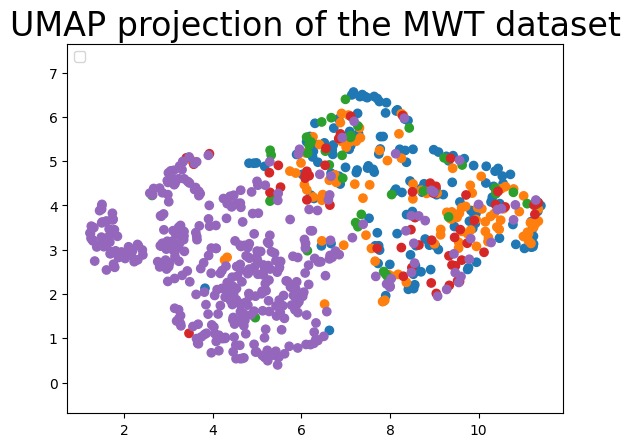

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(
    u[:, 0],
    u[:, 1],
    c=[sns.color_palette()[x] for x in filtered_no_na.dropna().Screen.map({"PD_Screen":0, "ASD_Screen":1, "Glia_Genes_Screen":2, "G-Proteins_Screen":3, "Neuron_Genes_Screen":4})],
    )
plt.legend(loc="upper left")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MWT dataset', fontsize=24);

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(
    filtered_u[:, 0],
    filtered_u[:, 1],
    c=[sns.color_palette()[x] for x in filtered.dropna().Screen.map({"PD_Screen":0, "ASD_Screen":1, "Glia_Genes_Screen":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MWT dataset', fontsize=24);